In [11]:
from text3d2video.artifacts.texture_artifact import TextureArtifact
import wandb_util.wandb_util as wbu

texture_art = TextureArtifact.from_wandb_artifact_tag("texture:v40")
texture = texture_art.read_texture()
texture_pil = texture_art.read_texture_pil()

make_tex_run = texture_art.logged_by()

In [12]:
from text3d2video.artifacts.anim_artifact import AnimationArtifact

anim = wbu.used_artifacts(make_tex_run, "animation")[0]
anim = AnimationArtifact.from_wandb_artifact(anim)
cams, meshes = anim.load_frames()
verts_uvs, faces_uvs = anim.uv_data()

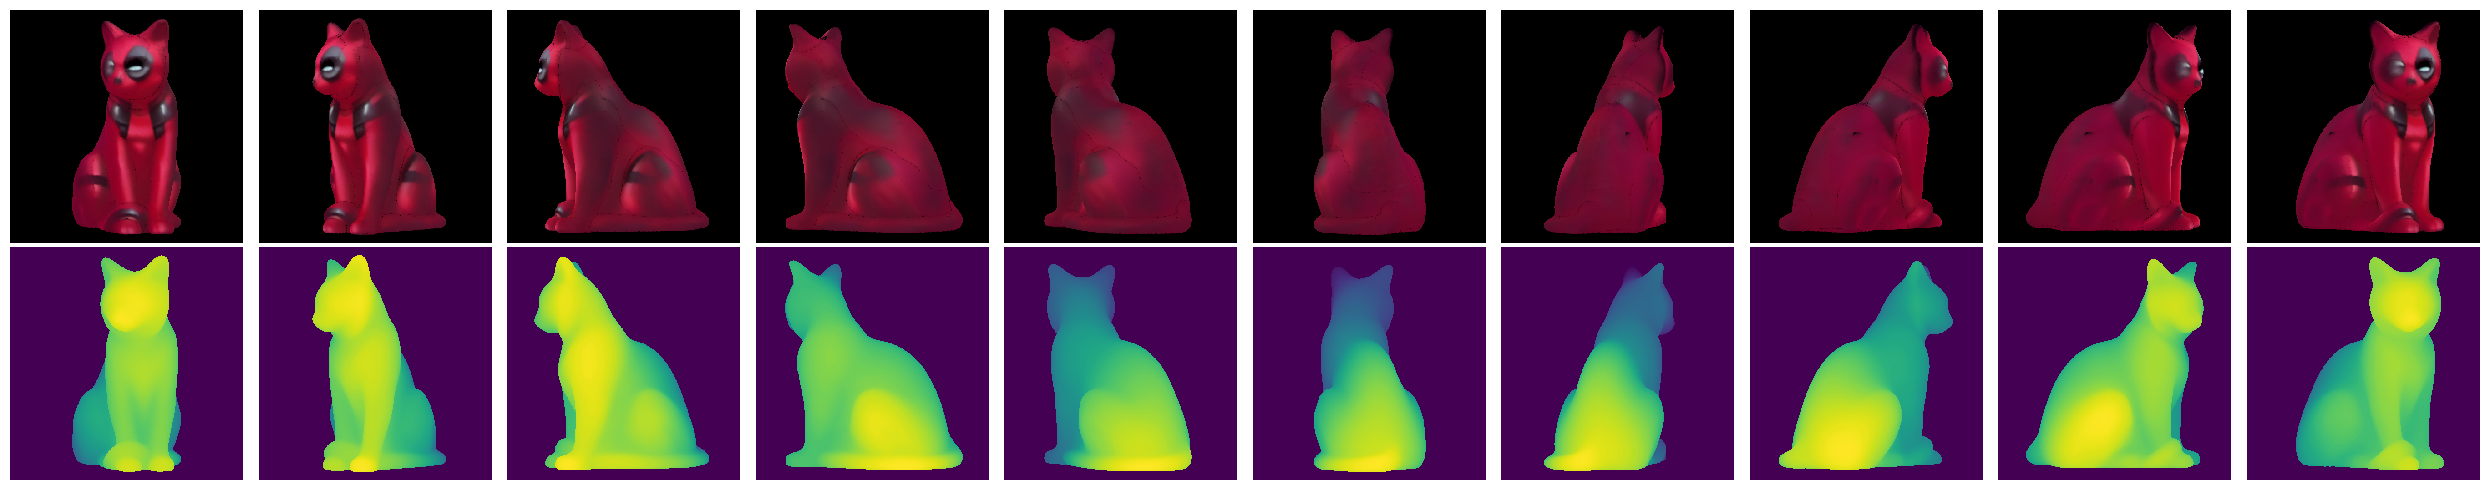

In [13]:
from text3d2video.rendering import render_depth_map, render_texture
from text3d2video.utilities.ipython_utils import display_ims, display_ims_grid

renders = render_texture(meshes, cams, texture, verts_uvs, faces_uvs, return_pil=True)
depths = render_depth_map(meshes, cams)
display_ims_grid([renders, depths])

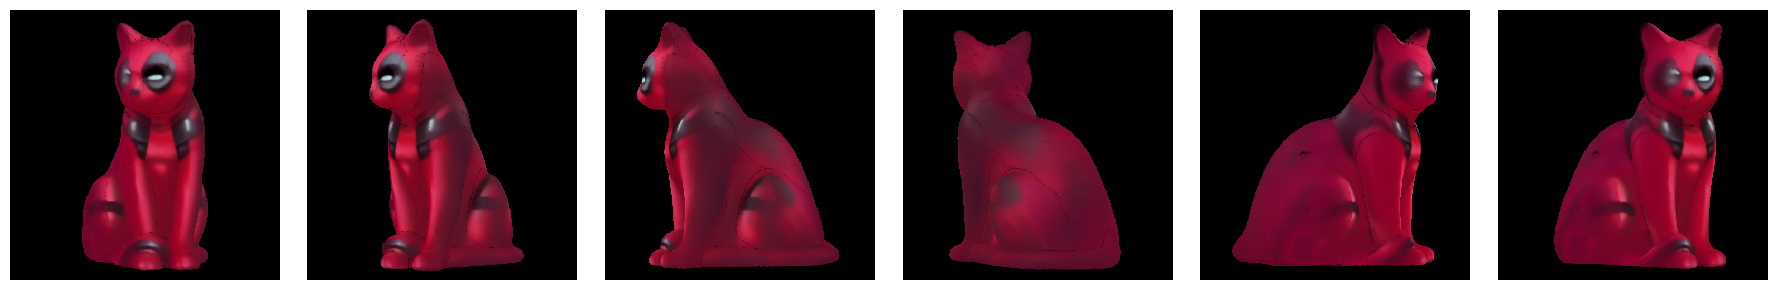

In [14]:
# frame_indices = ordered_sample_indices(renders, 6)
frame_indices = [0, 1, 2, 4, 8, 9]

renders_fig = [renders[i] for i in frame_indices]
depths_fig = [depths[i] for i in frame_indices]

display_ims(renders_fig)

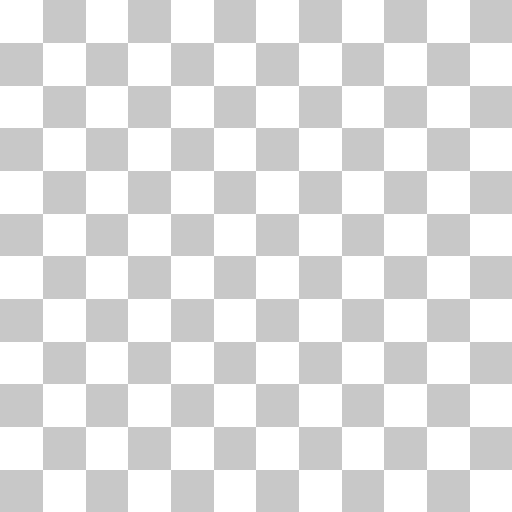

In [15]:
from text3d2video.util import chw_to_hwc
from text3d2video.utilities.testing_utils import checkerboard_img
import torchvision.transforms.functional as TF

white = (256, 256, 256)
gray = (200, 200, 200)

res = 512
square_size = res / 12

empty_texture_pil = checkerboard_img(
    color1=white, color2=gray, res=res, square_size=square_size
)

empty_texture_pil

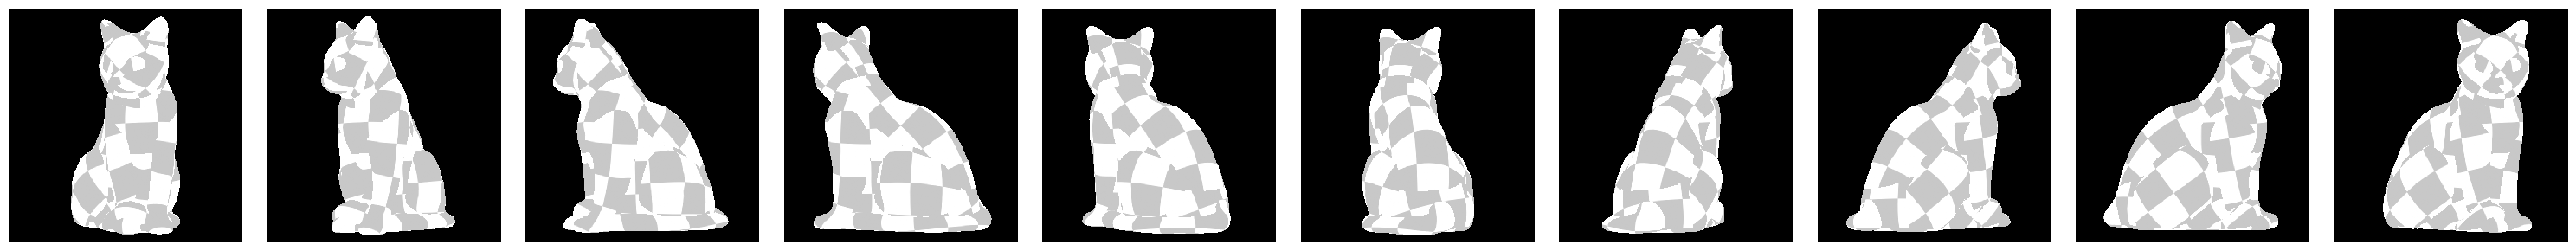

In [6]:
empty_texture = chw_to_hwc(TF.to_tensor(empty_texture_pil)).cuda()

renders_empty = render_texture(
    meshes,
    cams,
    empty_texture,
    verts_uvs,
    faces_uvs,
    return_pil=True,
)

display_ims(renders_empty)

In [17]:
from text3d2video.util import create_fresh_dir
from text3d2video.utilities.figure_creation_utils import write_image_seq


path = create_fresh_dir("outs/texturing_pipeline_fig")
write_image_seq(path, "renders", renders_fig)
write_image_seq(path, "depths", depths_fig)
texture_pil.save(path / "texture.png")
empty_texture_pil.save(path / "empty_texture.png")